                                             Forêt Aléatoires
    
    
                    Utilisations et utilités des méthodes ensembliste (Bagging et boosting)
                    
                    
                    
                    
                    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

                                    Importation et Exploitation de la base

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target
list (digits)    

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [3]:
images = digits.images

figure = plt.figure (figsize = (16, 10))
for i, image in enumerate (images[:10]):
    plt.subplot (1, 10, i+1)
    plt.imshow(image)
print ('\n')    
plt.show()
print ('\n')

Avant de commencer on va d'abord calculer le score de notre base pour pouvoir plus tard le comparer avec le score   de notre bese d'apprentissage et de test pour voir le comportement sur les données différents de celle de l'apprentissage

In [4]:
arbre = DecisionTreeClassifier()
arbre.fit (X, Y)
goal = arbre.score (X, Y)
goal

1.0

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
arbre = DecisionTreeClassifier()
arbre.fit (X_train, Y_train)
SCORE = arbre.score(X_test, Y_test)
SCORE

0.8520578420467185

In [6]:
pd.DataFrame ({"score sans découpage": goal, "score avec découpage": SCORE}, index = [0])

score sans découpage  score avec découpage
0                   1.0              0.852058

## _Le Bagging_

                                                    Question :

    Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.                                                       Quepouvons-nous conclure ?

In [7]:
N = 100
accuracies = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    arbre = DecisionTreeClassifier()
    arbre.fit (X_train, Y_train)
    score = arbre.score (X_train, Y_train)
    Score = arbre.score (X_test, Y_test)
    accuracies.append (Score)
    print ("{:.2f}".format(max(accuracies)))
moy = np.mean(accuracies)
variance = np.var(accuracies)

print ("\nla moyenne est de {:.2f} , \net la variance est égale à {:.6f} \n".format(moy, variance))

0.81
0.81
0.83
0.83
0.83
0.83
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.86
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87
0.87

la moyenne est de 0.83 , 
et la variance est égale à 0.000233 



la valeur du score le plus élevé est de 87%.

In [8]:
np.std(accuracies)

0.015270912728113097

                        Construction de notre classifieur bagging pour comparer ......

Affichage des paramètres du bagging

In [9]:
a = BaggingClassifier()
print ("\n",a.get_params().keys(), "\n")


 dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']) 



In [10]:
bag = BaggingClassifier (DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
bag.fit(X_train, Y_train)
bag.predict (X_test)
score_1 = bag.score(X_test, Y_test)
score_1

0.9710789766407119

                                             Question 2:

1. Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. 
2. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

In [11]:
N = 100
accuracie = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    arbre_1 = BaggingClassifier (DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
    arbre_1.fit (X_train, Y_train)
    Scor = arbre_1.score (X_test, Y_test)
    accuracie.append (Scor)
    print ("{:.2f}".format(max(accuracie)))
moy = np.mean(accuracie)
Variance = np.var(accuracie)

print ("\nla moyenne est de {:.2f} , \net la variance est égale à {:.6f} \n".format(moy, Variance))

0.95
0.95
0.96
0.96
0.96
0.96
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.97
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98

la moyenne est de 0.96 , 
et la variance est égale à 0.000047 



La moyenne tourne autour de 94% et 98

                          Comparaison du score obtenu avec et sans bagging

In [12]:
pd.DataFrame ({ "score sans bagging": max(accuracies).round(2)
               , "score avec bagging": max(accuracie).round(2)}
              , index = [0])

score sans bagging  score avec bagging
0                0.87                0.98

l'analyse des résultats obtenus permet de dire que le modèle performe mieux avec le bagging (98%).

                        Comparaison de la variance de base et celle du bagging

In [13]:
pd.DataFrame ({"variance sans bagging": variance, "variance avec bagging": Variance}, index = [0])

variance sans bagging  variance avec bagging
0               0.000233               0.000047

Les variances sont presque égales (mais plus nulle avec le bagging)

                                             Question 3:

                   Construire le graphique accuracy vs n_estimators. Que constatez-vous ?

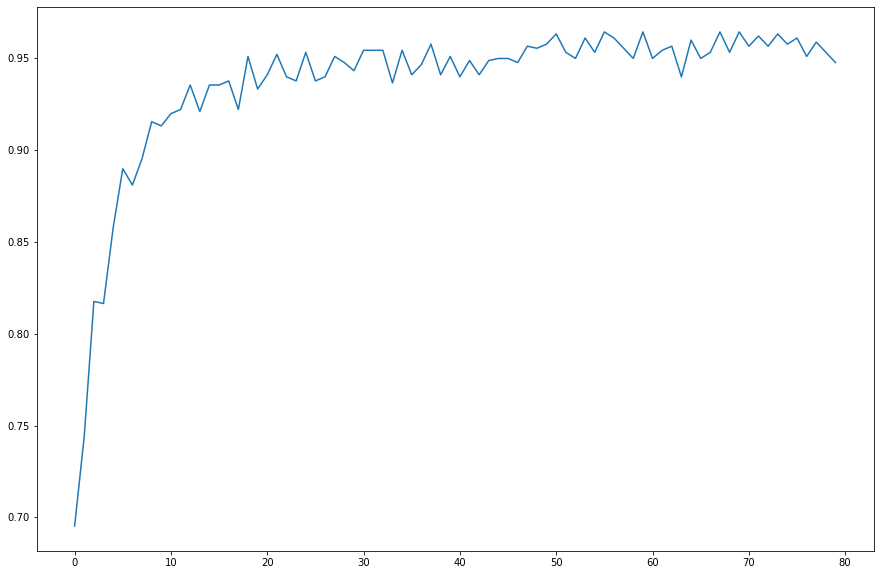

In [14]:
N = 80
but = []

for i in range (N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    trees = BaggingClassifier (DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i+1)
    trees.fit(X_train, Y_train)
    a = trees.score (X_test, Y_test)
    but.append (a)
    
plt.figure (figsize=(15, 10))
plt.plot([i for i in range (N)], but)
plt.show()

# n_estimators ne peut pas être égale à i car i commene à partir de zéro d'ou le i+1, mettre zéro pour voir

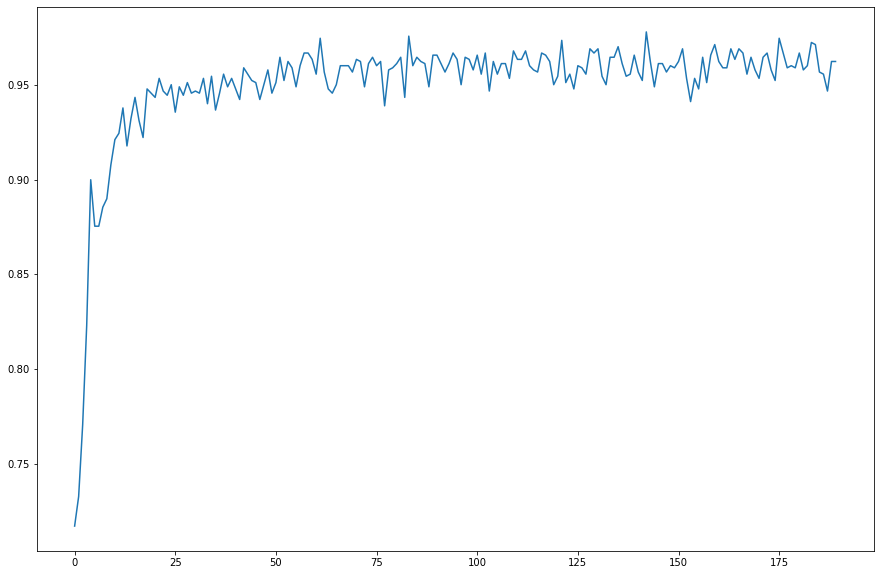

In [15]:
N = 190
but = []

for i in range (N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    trees = BaggingClassifier (DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i+1)
    trees.fit(X_train, Y_train)
    a = trees.score (X_test, Y_test)
    but.append (a)
    
plt.figure (figsize=(15, 10))
plt.plot([i for i in range (N)], but)
plt.show()

Nous voyons bien avec ces 2 graphes que le taux de précision augmente avec le n_estimators (baisse du taux d'erreur). On voit aussi bien l'inconvénient du modèle dès que le n_estimator devient important qui est la lenteur de l'algorithme.

Cependant avec un certain n_estimators on n'obtient plus de différence (il se stabilise) 

                                              Question 4:

1. Faites varier les parametres max_samples et max_features. 


2. Pour quelles valeurs on obtient le meilleur résultat ?    
    On pourra notamment utiliser GridSearchCV pour réaliser une recherche systématique.

In [16]:
parametres = [{"max_samples" : [e for e in np.arange (0.1, 1, 1/10).round(1)],
               "max_features" : [v for v in np.arange (0.1, 1, 1/10).round(1)]
              }]

grid_search = GridSearchCV (estimator = BaggingClassifier(DecisionTreeClassifier()),
                            param_grid = parametres,
                            cv = 5 
                           )

grid_search = grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'max_features': 0.9, 'max_samples': 0.9}

In [17]:
grid_search.best_score_

0.9309869646182495

      Avec un score de 93%, on aura de meilleurs résultats pour un max_features de 70% et max_samples de 90%.

## _Forêt Aléatoire_

                                             Question 5:

Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [18]:
from sklearn.ensemble import RandomForestClassifier

w = RandomForestClassifier()
w.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [19]:
# Arbre de Décision
clas = DecisionTreeClassifier()
clas.fit(X_train, Y_train)
res = clas.score(X_test, Y_test)

# Bagging
cla = BaggingClassifier (DecisionTreeClassifier(), max_samples = 0.5,
                         max_features = 0.5, n_estimators = 200)
cla.fit (X_train, Y_train)
result = cla.score (X_test, Y_test)

# RandomForest
classe = RandomForestClassifier ( n_estimators = 200)
classe.fit (X_train, Y_train)
result_1 = classe.score(X_test, Y_test)


pd.DataFrame ({"score arbre decision" : res, "score Bagging" : result, "score RandomF" : result_1}, index = [0])

score arbre decision  score Bagging  score RandomF
0               0.83426       0.965517       0.974416

On voit ici que le Randomf est nettement meilleur que les autres méthodes

                                              Question 6:

Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?

In [20]:
N = 25
bag_accuracies = []
for i in range (N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    bagg = BaggingClassifier (DecisionTreeClassifier(), max_samples = 0.5, n_estimators = 40)
    bagg.fit (X_train, Y_train)
    sco = bagg.score (X_test, Y_test)
    bag_accuracies.append(sco)
    
random_accuracies = []
for i in range (N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    ran = RandomForestClassifier (n_estimators = 40)
    ran.fit (X_train, Y_train)
    roc = ran.score (X_test, Y_test)
    random_accuracies.append (roc)
    
pd.DataFrame ({'accuracy bagging' : sco, 'accuracy randomf' : roc}, index = [0])

accuracy bagging  accuracy randomf
0          0.938821          0.968854

Le score obtenu avec le Random forest est encore plus élevé que celui obtenu avec le bagging

                                                Question 7:

Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

In [21]:
N = 35
random_accur = []
for i in range (N):
    X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.5)
    ran = RandomForestClassifier (n_estimators = N)
    ran.fit (X_train, Y_train)
    roc = ran.score (X_test, Y_test)
    random_accur.append (roc)

plt.figure (figsize = (15, 9))
plt.plot ([i for i in range(N)], random_accur)
plt.ylabel ("random accuracies")
plt.xlabel ("nombres d'estimateurs")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [22]:
from sklearn.ensemble import AdaBoostClassifier

v = AdaBoostClassifier()
v.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [23]:
boost = AdaBoostClassifier (base_estimator = DecisionTreeClassifier(),  n_estimators=200)
boost.fit(X_train, Y_train)
boost.predict (X_test)
score_2 = boost.score(X_test, Y_test)
score_2

0.8131256952169077

Nous allons voir si on peut trouver un score meilleur à l'aide des paramètres

In [24]:
parametres = [{"random_state" : [e for e in np.arange (1, 30, 1).round(1)],
               "learning_rate" : [v for v in np.arange (0.1, 1, 1/10).round(1)],
               "n_estimators" : [u for u in np.arange (100, 1000, 100)]
              }]

grid_search_1 = GridSearchCV (estimator = AdaBoostClassifier(DecisionTreeClassifier()),
                            param_grid = parametres,
                            cv = 5 
                           )

grid_search = grid_search_1.fit(X_train, Y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 15}

In [27]:
boost = AdaBoostClassifier (base_estimator = DecisionTreeClassifier(),  n_estimators=100,
                            random_state = 15, learning_rate = 0.1)
boost.fit(X_train, Y_train)
boost.predict (X_test)
score_3 = boost.score(X_test, Y_test)
score_3

0.8120133481646273

Affichons les différents scores pour voir les différences avec le modèles 

In [30]:
# Arbre de Décision
clas = DecisionTreeClassifier()
clas.fit(X_train, Y_train)
res = clas.score(X_test, Y_test)

# Bagging
cla = BaggingClassifier (DecisionTreeClassifier(), max_samples = 0.5,
                         max_features = 0.5, n_estimators = 200)
cla.fit (X_train, Y_train)
result = cla.score (X_test, Y_test)

# RandomForest
classe = RandomForestClassifier (n_estimators = 200)
classe.fit (X_train, Y_train)
result_1 = classe.score(X_test, Y_test)

#AdaBoost
cl = AdaBoostClassifier (n_estimators = 100, random_state = 15)
cl.fit (X_train, Y_train)
result_2 = cl.score(X_test, Y_test)



pd.DataFrame ({"score arbre decision" : res, "score Bagging" : result, "score RandomF" : result_1, "score_AdaBoost" : result_2}, index = [0])

score arbre decision  score Bagging  score RandomF  score_AdaBoost
0              0.818687       0.963293       0.968854        0.522803